各列のデータの関係を調べる
=======================

一つ一つの列について，どのようなデータが入っているかは調べました．

これから列同士の関係を調べていきましょう．

In [10]:
import numpy as np
import pandas as pd
import pathlib

train_data_path = pathlib.Path("../input/spaceship-titanic/train.csv")
train_data = pd.read_csv(
    train_data_path,
    dtype={
        "PassengerId": "string",
        "HomePlanet": "string",
        "Cabin": "string",
        "Destination": "string",
    },
)

## 散布図を出す

数値属性の列の組については，相関係数を求めることで関係を調べることができますが，相関係数だけだと数値が出てくるだけで分布の仕方がわからないので，散布図を出しましょう

ヒストグラムを出したときに，`RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck` の分布は似通っていましたね．

互いに関係があるのか，散布図を出力して調べてみましょう．

`scatter_matrix` という関数を使うと，指定した列の任意の組に対する散布図を出力してくれます．

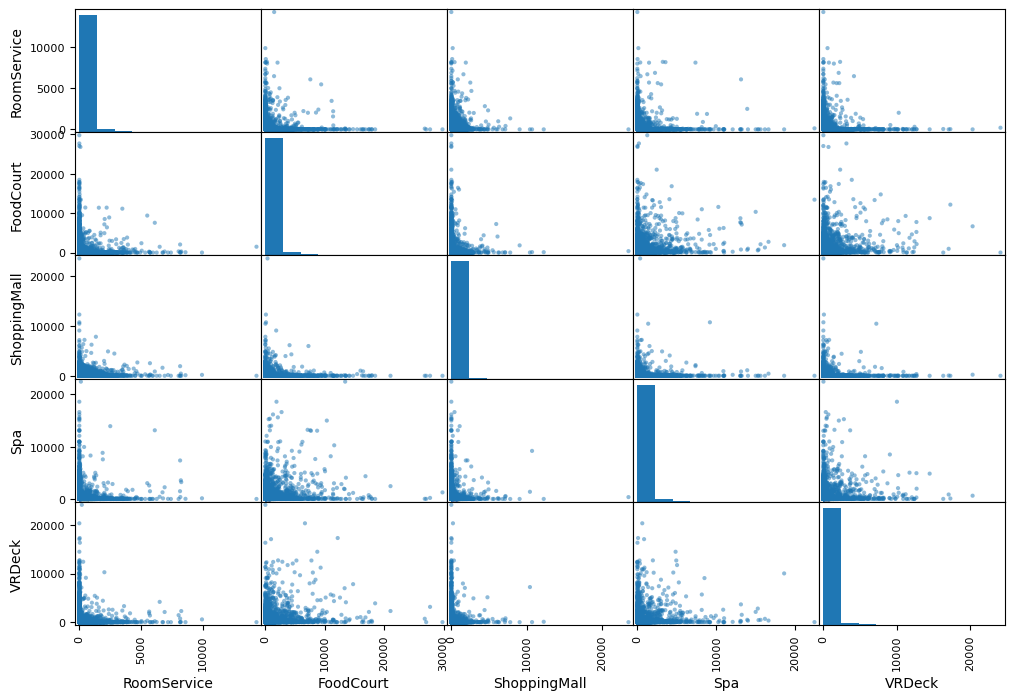

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

attributes = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
scatter_matrix(train_data[attributes], figsize=(12, 8), diagonal='hist')
plt.show()

```{note}
対角線上は同じ列同士の相関を調べても仕方ないので，ヒストグラムを出しています．
```

散布図を見る限り，どの２組に対しても相関関係はないようですね．

ただ，一方が大きければもう一方は小さくなる傾向はありそうです．

## ヒストグラムを重ねる

予測対象の列 `Transported` は数値ではありませんが，相関係数を計算することは可能です．

`corr` で列同士の相関係数を計算して，`Transported` との相関係数の値が高い順に出力してみましょう．

In [15]:
corr_matrix = train_data.corr(numeric_only=True)
corr_matrix["Transported"].sort_values(ascending=False)

Transported     1.000000
FoodCourt       0.046566
ShoppingMall    0.010141
Age            -0.075026
VRDeck         -0.207075
Spa            -0.221131
RoomService    -0.244611
Name: Transported, dtype: float64

`Spa` と `RoomService` と `VRDeck` が比較的強い負の相関を持っていることがわかります．

しかし，相関係数を出すだけだとやはり分布がわからないので，ここでもヒストグラムを出してみましょう．

`Transported` の値が True であるか False であるかで場合分けしてヒストグラムを出し，それを重ねます．

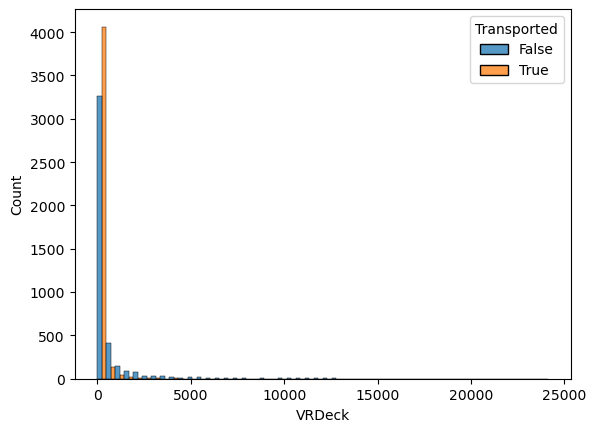

In [32]:
import seaborn as sns

sns.histplot(data=train_data, x="VRDeck", hue="Transported", multiple="dodge", bins=50)
plt.show()

ヒストグラムが出せました．しかし，0 付近以外は値が小さすぎて見づらいですね．

横軸を対数スケールにしてもう一度ヒストグラムを出しましょう．

<Axes: xlabel='VRDeck', ylabel='Count'>

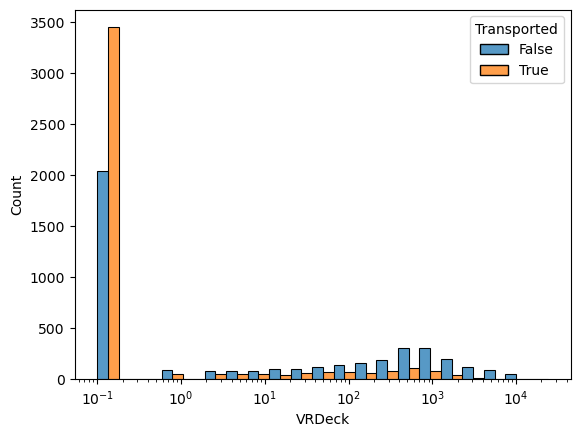

In [35]:
import seaborn as sns

sns.histplot(
    data=train_data.replace(0, 0.1),
    x="VRDeck",
    hue="Transported",
    multiple="dodge",
    log_scale=True,
)
plt.show()

```{note}
対数関数は０での値がマイナス無限大になりますが，無限大になるとヒストグラムが書けないので，０の部分は 0.1 に置き換えてグラフを書いています．
```

見やすいグラフになりました．

これを見ると，`VRDeck` を使用していない（つまり図で値が 0.1 になっている）ことと，`Transported` が True であることが同時に起こりやすいことがわかりますね．

他の特徴量に関しても，同様にして視覚化していきましょう．

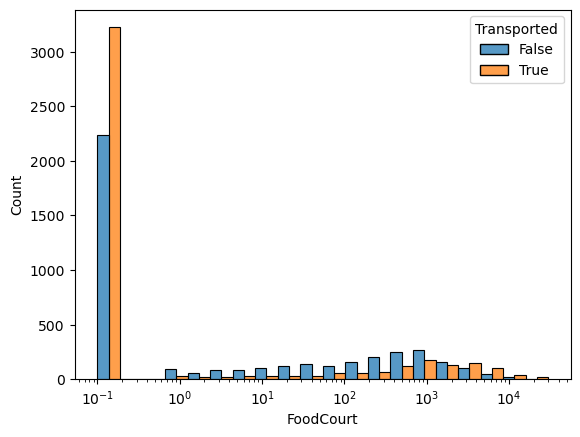

In [37]:
import seaborn as sns

sns.histplot(
    data=train_data.replace(0, 0.1),
    x="FoodCourt",
    hue="Transported",
    multiple="dodge",
    log_scale=True,
)
plt.show()

`FoodCourt` に関しても，使用しなかった人の過半数が異次元に飛ばされてしまっているのですが，非常に多く利用したひとの中にも異次元に飛ばされた人がいるため，相関係数が中途半端になっていたようです．